In [23]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
from scipy.ndimage import label
from scipy.signal import chirp, spectrogram
from scipy.signal import spectral

Text(0, 0.5, 'Amplitude')

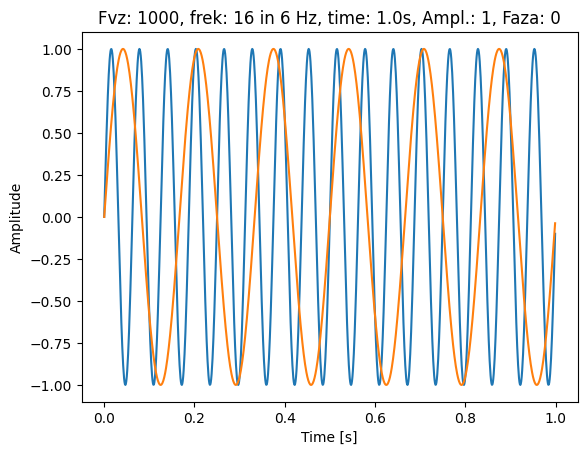

In [20]:
Fs = 1000
T = 1.0
t = np.arange(0, T, 1.0 / Fs)
freq1 = 16
freq2 = 6
A = 1
p = 0 # Faza

y1 = A * np.sin((2 * np.pi * freq1 * t) + p)
y2 = A * np.sin((2 * np.pi * freq2 * t) + p)

plt.title(f'Fvz: {Fs}, frek: {freq1} in {freq2} Hz, time: {T}s, Ampl.: {A}, Faza: {p}')
plt.plot(t, y1)
plt.plot(t, y2)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')


### Combine 2 signals with different frequencies into a new signal

Text(0, 0.5, 'Amplitude')

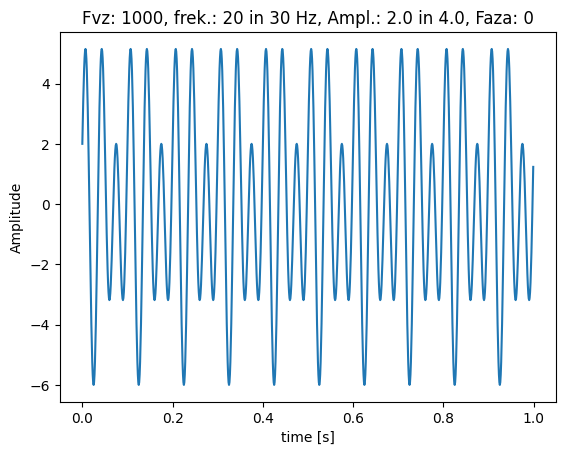

In [25]:
Fs = 1000
T = 1.0
t = np.arange(0, T, 1.0 / Fs)
A1 = 2.0
A2 = 4.0
p = 0
freq1 = 20
freq2 = 30

y1 = A1 * np.cos((2 * np.pi * freq1 * t) + p)
y2 = A2 * np.sin((2 * np.pi * freq2 * t) + p)

ys = y1 + y2

plt.plot(t, ys)
plt.title(f'Fvz: {Fs}, frek.: {freq1} in {freq2} Hz, Ampl.: {A1} in {A2}, Faza: {p}')
plt.xlabel('time [s]')
plt.ylabel('Amplitude')

In [39]:
# Ustvarimo sin in cos s frekfenco 20Hz
Fs = 1000
freq = 20
T = 1.0
p = 0
A = 1.0

t = np.arange(0, T, (1.0 / Fs))

base_cos = A * np.cos((2 * np.pi * t * freq) + p)
base_sin = A * np.sin((2 * np.pi * t * freq) + p)

# Preverimo alo se sin / cos z frekfenco 20Hz nahaja v signalu "ys"
# Za preverjanje uporabimo skalarni produkt (0 - signal ni prisoten, drugace je)
print(f'sin ({freq} Hz): {np.round(np.dot(base_sin, ys), 2)}')
print(f'cos ({freq} Hz): {np.round(np.dot(base_cos, ys), 2)}')
# Vidimo da se cos 20Hz nahaja v signalu "ys" z amplitudo 1000

# Ustvarimo sin in cos s frekfenco 30Hz
Fs = 1000
A = 1.0
T = 1.0
freq = 30
t = np.arange(0, T, 1.0 / Fs)
p = 0

base_cos = A * np.cos((2 * np.pi * t * freq) + p)
base_sin = A * np.sin((2 * np.pi * t * freq) + p)

# Preverimo ali se sin / cos s frekfecno 30Hz nahaja v signalu "ys" --> koristimo skalarni produkt
print(f'sin ({freq} Hz): {np.round(np.dot(base_sin, ys),2)}')
print(f'cos ({freq} Hz): {np.round(np.dot(base_cos, ys),2)}')
# Vidimo, da se sin s frekfecno 30Hz nahaja v signalu z amplitudo 2000


sin (20 Hz): -0.0
cos (20 Hz): 1000.0
sin (30 Hz): 2000.0
cos (30 Hz): -0.0


20Hz amplitude: 1000.0
30Hz amplitude: 2000.0


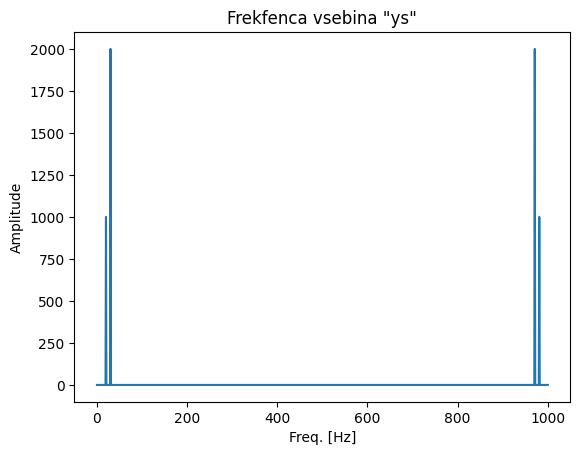

In [46]:
Ys = np.fft.fft(ys)
N = len(ys)
x = np.linspace(0, Fs, N)

plt.plot(x, np.abs(Ys)) # Uporabimo abs da predstavimo samo realne vrednosti
plt.title("Frekfenca vsebina \"ys\"")
plt.xlabel("Freq. [Hz]")
plt.ylabel("Amplitude")

print(f"20Hz amplitude: {np.round(np.abs(Ys[20]), 2)}")
print(f"30Hz amplitude: {np.round(np.abs(Ys[30]), 2)}")

# Z frekfecno obdevalo lahko vidimo, da sta v signalu prisotni frekfenci 20 in 30 Hz
# Frekfenci sta prisotni s amplitudama 1000 in 2000, kar smo v prejsnjem primeru pravtako ugotovili s pomocjo skalarnega produkta

# SD-DFT
Z klasično DFT/FFT analizo lahko vidimo, katere frekvence so v signalu prisotne, ne moremo pa določiti, kdaj nastopijo
Da bi lahko določili, kdaj katera frekvenca nastopi moramo uporabiti SD-DFT oz. kratko časovni DFT, ki izvaja DFT/FFT na manjšimi okni.
- Okno mora biti manjšo ali eni dolžini signala
- Okna se pri premikanju lahko prekrivajo ali ne
- Večje okno nam bo omogočilo natančnejše določanje frekvenca, ki nastopijo v signalu vendar bomo s tem izgubili časovno natančnost (kdaj kera frekvenca nastopi)
- Pri manjših oknih bomo imeli višjo časovno natančnost a bomo izgubili natančnost pri določanju frekvenc
- Velja torej princip **časovne in frekvenče nedoločljivosti** kar pomeni, da moramo biti pri interpretaciji previdni

Text(0, 0.5, 'Amplitude')

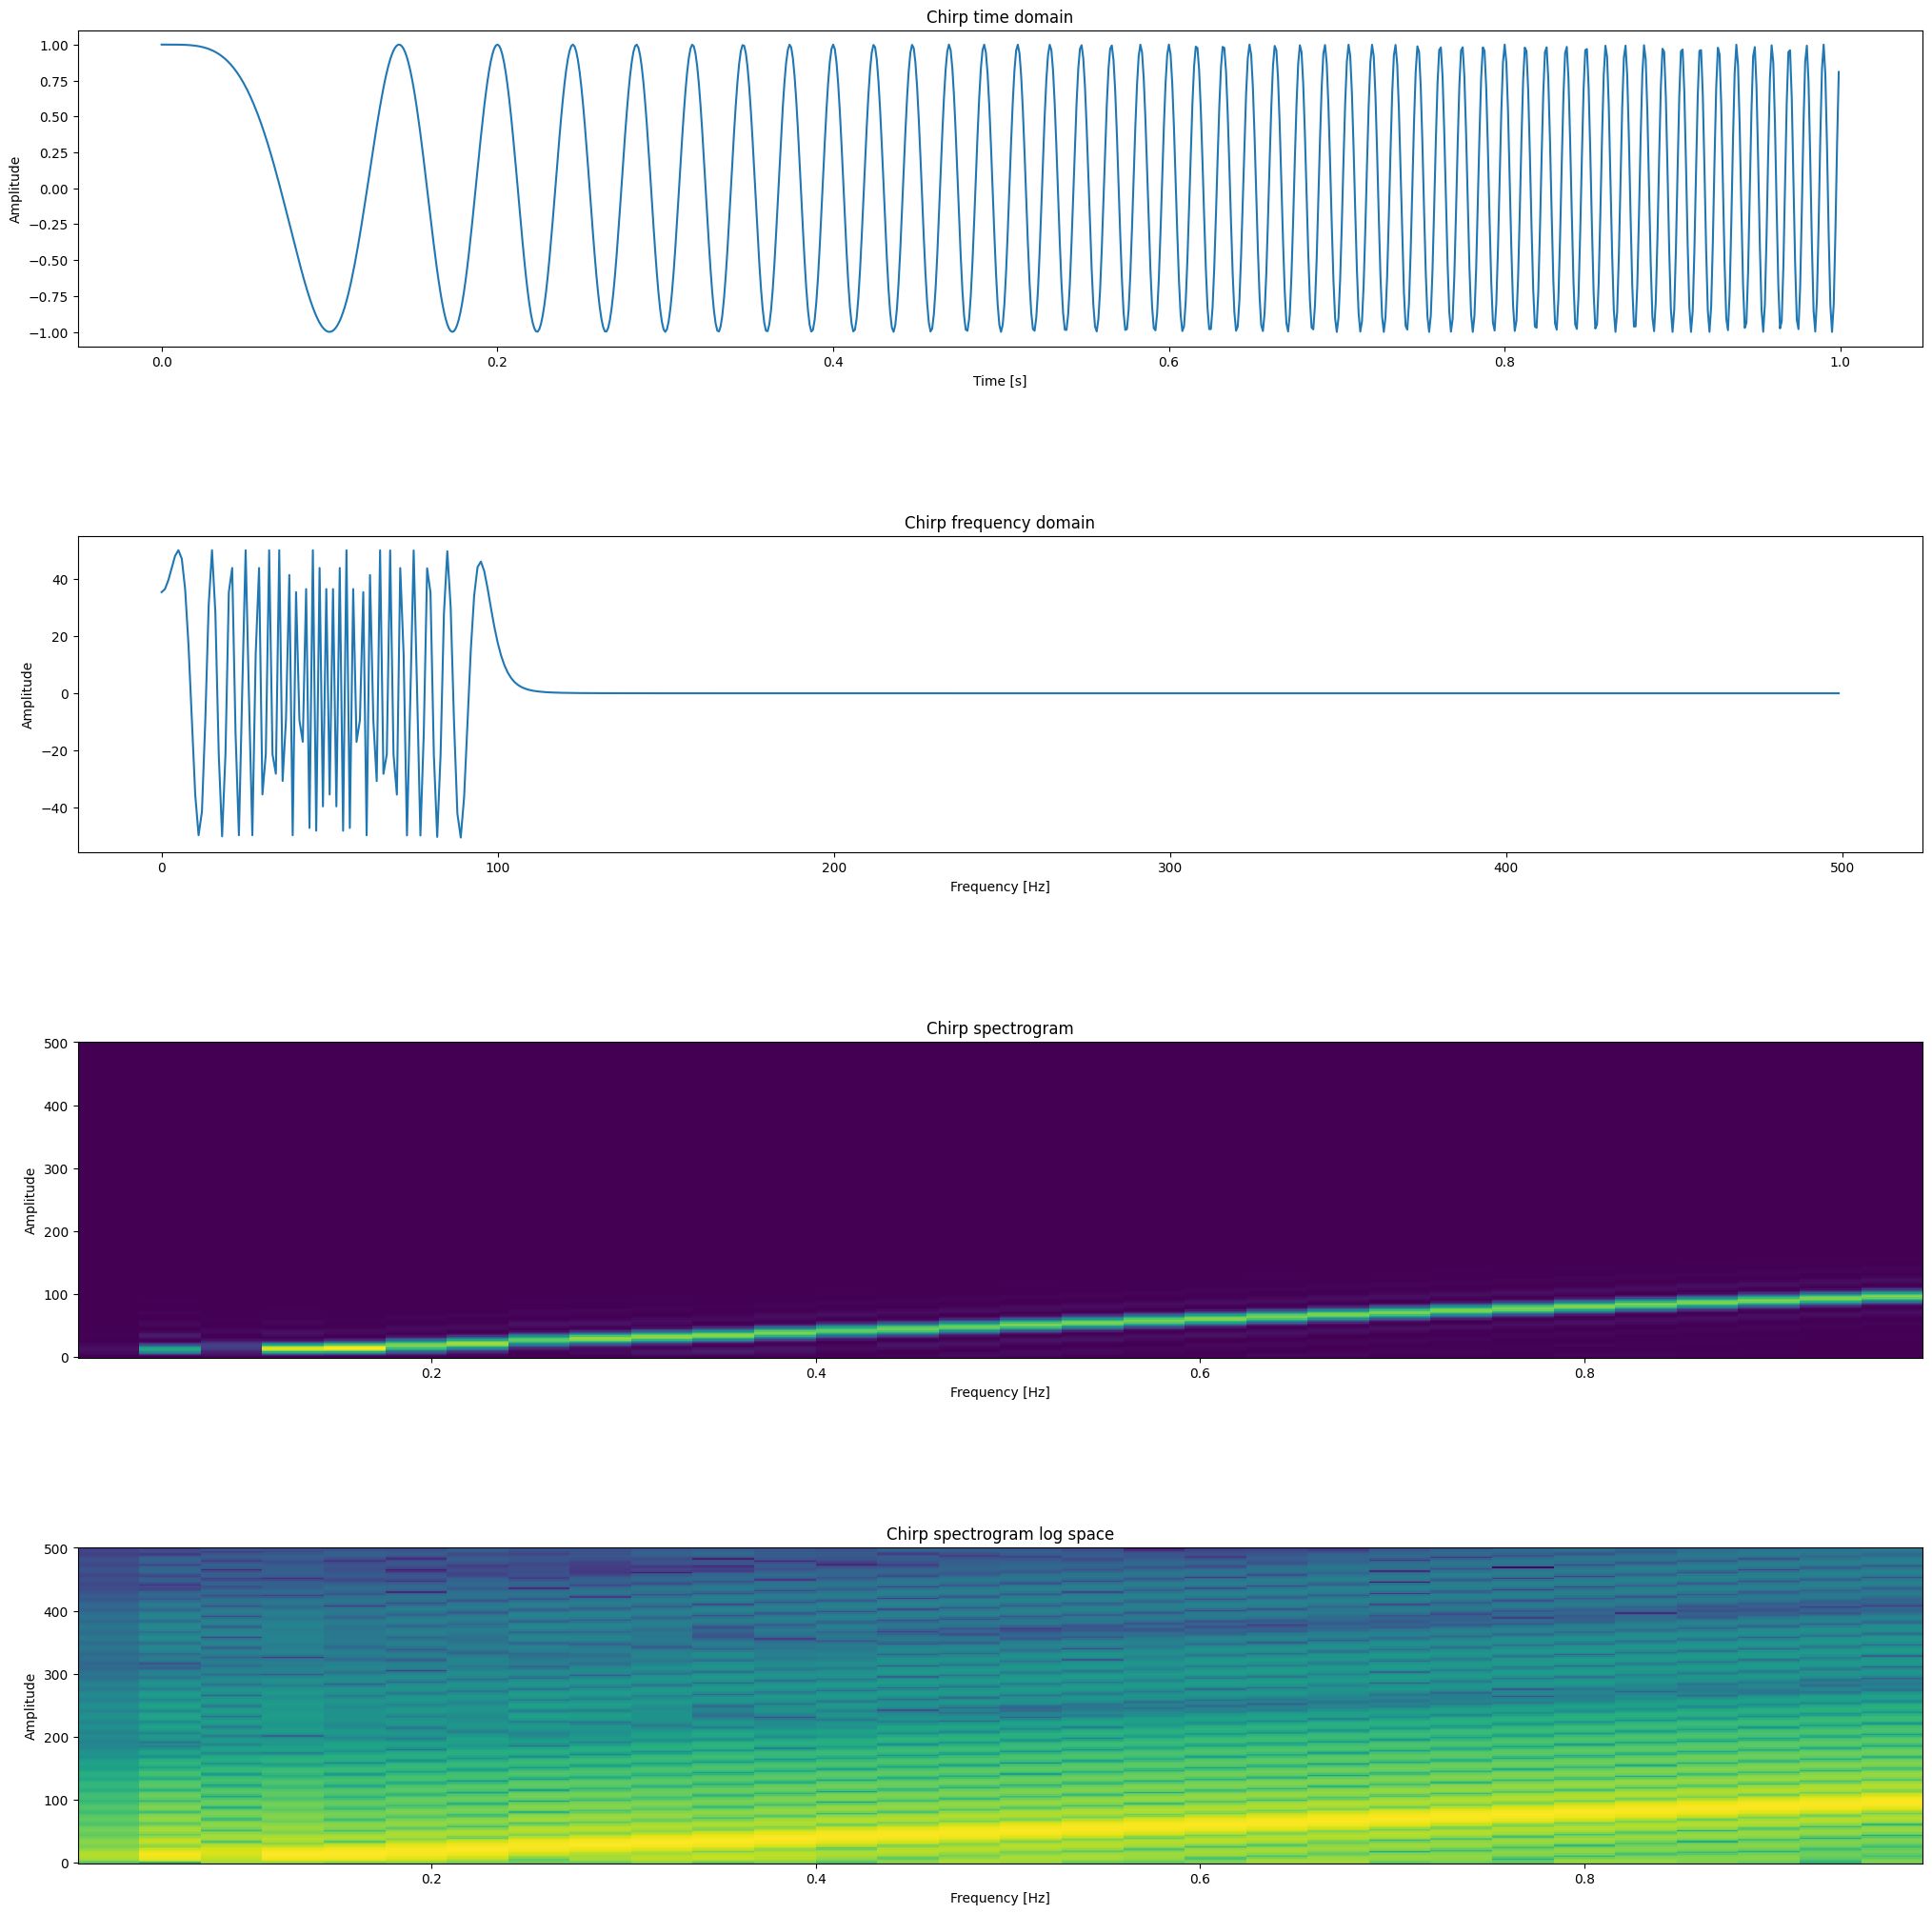

In [41]:
Fs = 1000
T = 1
t = np.arange(0, T, 1/Fs)
N = T * Fs

freq_start = 0
freq_end = 100

y = chirp(t, f0=freq_start, f1=freq_end, t1=T, method='linear')

ys = np.fft.fft(y)[:N//2]
freq = np.fft.fftfreq(Fs, 1/Fs)[:N//2]

window_size = 64 # število vzorcev, ki jih bo okno zajemalo
overlap_size = 32 # koliko vzorcev se bo prekrivalo med okni (priporočano prekrivanje vsaj 50%)
nfft = 512 # Število frekvenc, s katerim bo DFT tipal signal (potenca števila 2 oz. vsaj enak kot window size)

fr, ti, sp = spectrogram(y, Fs, nperseg=window_size, noverlap=overlap_size, nfft=nfft) # frekvence, čas, amplitude

fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(25, 25), gridspec_kw={'hspace': 0.6})
axs[0].plot(t, y)
axs[0].set_title('Chirp time domain')
axs[0].set_xlabel('Time [s]')
axs[0].set_ylabel('Amplitude')

axs[1].plot(freq, ys)
axs[1].set_title('Chirp frequency domain')
axs[1].set_xlabel('Frequency [Hz]')
axs[1].set_ylabel('Amplitude')

axs[2].pcolormesh(ti, fr, np.abs(sp), shading='auto')
axs[2].set_title('Chirp spectrogram')
axs[2].set_xlabel('Frequency [Hz]')
axs[2].set_ylabel('Amplitude')

# log. skala - gostota močnostenga spektra - Power Spectral Density (PSD)
axs[3].pcolormesh(ti, fr, 10 * np.log10(sp), shading='auto')
axs[3].set_title('Chirp spectrogram log space')
axs[3].set_xlabel('Frequency [Hz]')
axs[3].set_ylabel('Amplitude')

